In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import gzip

from urllib.request import urlopen
from xmltodict import parse
from zipfile import ZipFile
from io import BytesIO

# Open Data and Data APIs

Large part of doing data science is working with data: cleaning, understanding, filtering, and tranforming it. But in order to do that we need data. Unless you collect your own data, you will need to find interesting data sets that you can understand and ask questions about. Today, we are going to look at possible data sources and their uses.

An [application programming interface (API)](https://en.wikipedia.org/wiki/API) is a data connection between two pieces of software. For our purposes, it is a connection between a data consumer (you) and data provider.  Its primary function is **not** to provide data for human consumption, rather it is for exchanging data between two computer programs. In short, you'll use an API to fetch the data not to look at it in its raw form.


# Data From Municipalities

There are many cities that provide data about their workings. Here are some city municipalties that serve open data:

1. [Istanbul Municipality](https://data.ibb.gov.tr/)
2. [Izmir Municipality](https://acikveri.bizizmir.com/)
3. [Bursa Municipality](https://acikyesil.bursa.bel.tr/dataset/)
4. [Athens Open Data](http://geodata.gov.gr/en/dataset)
4. [Barcelona Municipality](https://opendata-ajuntament.barcelona.cat/)
5. [London Data Store](https://data.london.gov.uk/developers/)
6. [New York Open Data](https://opendata.cityofnewyork.us/)
7. [City of Montreal Open Data](https://donnees.montreal.ca/collections)
8. [City of Toronto Open Data](https://open.toronto.ca/)

Best way to explore is search "open data api" + your favorite city :) 


Here is the graph of mean natural gas consumption in Istanbul in (numbers are in 10 mil m3) per year


In [105]:
with urlopen('https://data.ibb.gov.tr/dataset/02bdc2d6-94bb-4e31-816e-528bc9d98703/resource/d5fe41b0-3848-4548-9ac7-6e4756c3027b/download/ilce-baznda-yllara-gore-doalgaz-tuketim-miktar-tr-en.xlsx') as url:
    data = pd.read_excel(url.read())

data

,Yıl,Ay_No,İlçe,Dogalgaz Tüketim Miktarı (m3)
0,2015,1,ADALAR,370333.756
1,2015,2,ADALAR,334257.446
2,2015,3,ADALAR,353314.028
3,2015,4,ADALAR,286268.529
4,2015,5,ADALAR,128612.845
...,...,...,...,...
3193,2021,6,ZEYTİNBURNU,4813337.694
3194,2021,7,ZEYTİNBURNU,3678340.464
3195,2021,8,ZEYTİNBURNU,4107641.635
3196,2021,9,ZEYTİNBURNU,4569888.391


<AxesSubplot:xlabel='Yıl'>

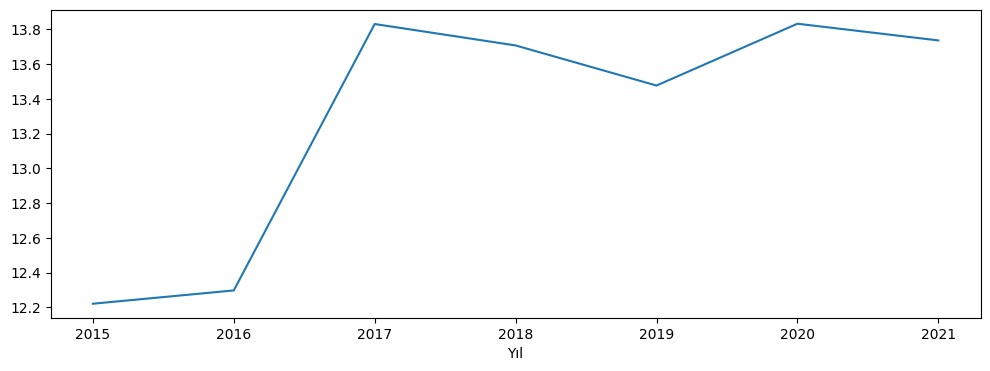

In [106]:
(data.groupby('Yıl')['Dogalgaz Tüketim Miktarı (m3)'].mean()/1e+06).plot(figsize=(12,4))

Here is an example data set from New York about squirrels in the Central Park:

In [4]:
with urlopen('https://data.cityofnewyork.us/resource/vfnx-vebw.csv') as file:
    squirrel = pd.read_csv(file)
    
squirrel

,x,y,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,kuks,quaas,moans,tail_flags,tail_twitches,approaches,indifferent,runs_from,other_interactions,geocoded_column
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-73.970315,40.778558,16D-AM-1007-01,16D,AM,10072018,1,Adult,Gray,White,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9703149829421 40.7785583630323)
996,-73.979090,40.768805,3B-AM-1010-10,03B,AM,10102018,10,Adult,Cinnamon,"Gray, White",...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9790896775237 40.7688048644871)
997,-73.960055,40.791497,33D-AM-1017-03,33D,AM,10172018,3,Adult,Gray,NaN,...,False,False,False,False,False,True,True,False,NaN,POINT (-73.9600546294497 40.7914969165757)
998,-73.980948,40.768569,2A-PM-1019-04,02A,PM,10192018,4,Juvenile,Gray,White,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.980948293606 40.7685688850628)


In [5]:
pd.crosstab(squirrel['tail_twitches'],squirrel['indifferent'])

indifferent,False,True
tail_twitches,,
False,454,409
True,72,65


# Data from Government Organizations

1. [European Central Bank](https://sdw.ecb.europa.eu/)
2. [OECD data](https://data.oecd.org/)
3. [The US Central Bank (FED) data](https://fred.stlouisfed.org/)
4. [The World Bank Data](https://data.worldbank.org/)
5. [The US Goverment](https://data.gov/developers/apis/index.html) collected all of its open data sources under a single service.
6. [Indian Government Data Portal](https://data.gov.in/)
7. [European Union Data Portal](https://data.europa.eu/en)
8. [Turkish Supreme Election Council](https://acikveri.ysk.gov.tr/anasayfa) (Yüksek Seçim Kurulu) also publishes critical data on all Turkish elections on their data service.
9. [International Monetary Fund (IMF) Data Portal](https://www.imf.org/en/Data)


In [7]:
with urlopen("http://www.ecb.europa.eu/stats/eurofxref/eurofxref-daily.xml") as conn:
    data = parse(conn.read())['gesmes:Envelope']['Cube']['Cube']['Cube']

rates = [ float(x['@rate']) for x in data ]
dates = [ x['@currency'] for x in data ]

df = pd.DataFrame({'rates': rates}, index=dates)
df

,rates
USD,0.9748
JPY,141.0100
BGN,1.9558
CZK,24.5490
DKK,7.4365
GBP,0.8830
HUF,422.1800
PLN,4.8483
RON,4.9490
SEK,10.8993


In [47]:
with urlopen('https://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=xml') as url:
    zfile = ZipFile(BytesIO(url.read()))
    print(zfile.filelist)
    data = parse(zfile.open('API_SP.POP.TOTL_DS2_en_xml_v2_4570889.xml').read())

[<ZipInfo filename='API_SP.POP.TOTL_DS2_en_xml_v2_4570889.xml' compress_type=deflate file_size=4122055 compress_size=161346>]


In [53]:
[{x['@name']: x['#text'] for x in y['field'] if '#text' in x.keys()} for y in data['Root']['data']['record']]

[{'Country or Area': 'Aruba',
  'Item': 'Population, total',
  'Year': '1960',
  'Value': '54208'},
 {'Country or Area': 'Aruba',
  'Item': 'Population, total',
  'Year': '1961',
  'Value': '55434'},
 {'Country or Area': 'Aruba',
  'Item': 'Population, total',
  'Year': '1962',
  'Value': '56234'},
 {'Country or Area': 'Aruba',
  'Item': 'Population, total',
  'Year': '1963',
  'Value': '56699'},
 {'Country or Area': 'Aruba',
  'Item': 'Population, total',
  'Year': '1964',
  'Value': '57029'},
 {'Country or Area': 'Aruba',
  'Item': 'Population, total',
  'Year': '1965',
  'Value': '57357'},
 {'Country or Area': 'Aruba',
  'Item': 'Population, total',
  'Year': '1966',
  'Value': '57702'},
 {'Country or Area': 'Aruba',
  'Item': 'Population, total',
  'Year': '1967',
  'Value': '58044'},
 {'Country or Area': 'Aruba',
  'Item': 'Population, total',
  'Year': '1968',
  'Value': '58377'},
 {'Country or Area': 'Aruba',
  'Item': 'Population, total',
  'Year': '1969',
  'Value': '58734'},


# Geological Survey and Satellite Image Data

1. [US Geological Survey (USGS)](https://www.usgs.gov/products) has a very large data store where you can get variety of scientific data that included Earthquakes, Satellite images, Maps, and much much more.
2. [European Space Agency](https://open.esa.int/) has an excellent open data service from which you can access a variety of data products such as maps, satellite images and more.
3. [NASA](https://data.nasa.gov/) also has an open data service.
1. [Grupo de Inteligencia Computacional de la Universidad del País Vasco (UPV/EHU)](http://www.ehu.eus/ccwintco/index.php/Hyperspectral_Remote_Sensing_Scenes) has some standard satellite image datasets that you can experiment with.
2. [A large list of open GIS Image data sets](https://freegisdata.rtwilson.com/)

### An Example from NASA

####  Global Landslide Catalog Export

> The Global Landslide Catalog (GLC) was developed with the goal of identifying rainfall-triggered landslide events > around the world, regardless of size, impacts or location. The GLC considers all types of mass movements triggered > by rainfall, which have been reported in the media, disaster databases, scientific reports, or other sources. The > GLC has been compiled since 2007 at NASA Goddard Space Flight Center. This is a unique data set with the ID tag “GLC” in the landslide editor.

In [54]:
with urlopen('https://data.nasa.gov/api/views/dd9e-wu2v/rows.csv?accessType=DOWNLOAD') as url:
    data = pd.read_csv(url)
    
landslidesTR = data.loc[data['country_code'] == 'TR']
landslidesTR[['event_date','admin_division_name','gazeteer_closest_point','longitude','latitude']]

,event_date,admin_division_name,gazeteer_closest_point,longitude,latitude
971,09/23/2009 08:00:00 PM,Artvin,Borçka,41.6822,41.3639
1155,07/16/2013 08:00:00 AM,Hatay,Hassa,36.4354,36.7619
1224,08/24/2015 12:00:00 AM,Artvin,Hopa,41.4323,41.3936
2030,09/09/2008 12:00:00 AM,Siirt,Gözpınar,41.5061,37.9472
2319,07/07/2016 11:00:00 PM,Trabzon,Dağbaşı,39.9081,40.8167
2608,09/09/2009 12:00:00 AM,Istanbul,Eminönü,28.9759,41.0124
2700,03/07/2013 12:00:00 AM,Hakkâri,Çukurca,43.6143,37.2506
2780,11/21/2009 12:00:00 AM,Trabzon,Trabzon,39.7365,40.9792
2958,01/27/2013 12:00:00 AM,Diyarbakır,Diyarbakır,40.2306,37.9152
3406,09/28/2008 12:00:00 AM,Sakarya,Karapürçek,30.4580,40.6900


### An Example from USGS

Paleohydrologic reconstructions of water-year streamflow for 31 stream gaging sites in the Missouri River Basin with complete data for 1685 through 1977

In [55]:
with urlopen('https://www.sciencebase.gov/catalog/file/get/5c994278e4b0b8a7f628903e?f=__disk__3d%2F8b%2F51%2F3d8b512c0dec73102f0c8d7b5c3e8d326dce54fa') as url:
    data = pd.read_csv(url)
    
data

,Latitude,Longitude,Gage or Reconstruction Name,USGS Gage ID,Year(row) /Id(col),1685,1686,1687,1688,1689,...,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977
0,45.116127,-112.75050,"Beaverhead River at Barretts, Montana",6016000,R1,444.433230,363.587220,794.49506,981.97470,658.24810,...,622.38715,600.00226,572.79840,728.22174,644.83290,591.26510,622.86070,612.43160,711.77300,425.95398
1,45.506912,-112.33089,"Ruby River near Twin Bridges, Montana",6023000,R2,219.264920,141.933170,245.13747,380.43802,185.72981,...,262.86417,316.82214,446.59970,305.67680,296.20413,241.70609,317.83478,381.02002,276.68330,232.38223
2,45.526581,-112.70172,"Big Hole River near Melrose, Montana",6025500,R3,1457.464000,1213.416700,1228.75370,932.24786,1080.46250,...,1378.20530,1602.58730,1269.83020,1799.21060,1339.16440,1042.20080,1608.72840,1624.03110,1836.77510,615.80316
3,45.897137,-111.59567,"Jefferson River near Three Forks, Montana",6036650,R4,2910.249800,2095.854500,3038.66970,3656.89580,2312.44870,...,3400.91630,3679.21660,3243.61080,3477.68460,2926.19140,2609.25900,3207.65870,3195.48750,3847.85770,2306.35380
4,45.490231,-111.63451,Madison River below Ennis Lake near McAllister...,6041000,R5,1215.694700,1445.360700,1898.49540,1967.13930,1418.36170,...,1961.48440,2027.46800,1646.18950,2304.48170,1867.69890,1773.10990,1891.25320,2068.86040,1942.11870,1431.26810
5,45.823559,-111.49966,"Madison River near Three Forks, Montana",6042500,R6,1529.759400,1630.721600,1848.33040,1986.04640,1639.65450,...,1835.35890,1960.75730,2249.08130,2346.00300,2089.77980,1816.17600,2281.50020,2089.39180,2072.58000,1471.04190
6,45.885357,-111.43829,"Gallatin River at Logan, Montana",6052500,R7,1158.373000,1124.973300,1156.45910,1501.32980,1279.30940,...,1519.12220,1522.14400,1686.82680,1896.32360,1329.28390,1280.63430,1437.24020,1702.78610,1755.73390,946.00340
7,46.146572,-111.42028,"Missouri River at Toston, Montana",6054500,R8,4906.707000,3933.409000,5750.33600,5431.72700,5060.82800,...,6346.73200,7067.96500,6532.60250,6476.41600,6229.90600,6263.93600,7455.65670,7631.82300,7175.91600,4608.80570
8,47.199024,-112.09591,"Dearborn River near Craig, Montana",6073500,R9,120.766320,188.489850,167.77414,112.52711,235.91763,...,169.14919,185.14203,207.92440,171.85780,140.97868,89.46792,172.00705,216.05415,281.65634,106.80695
9,47.190052,-111.38719,"Smith River near Eden, Montana",6077500,R10,296.586060,218.166660,249.01877,546.02515,730.56990,...,534.23740,535.42110,547.50714,377.71198,354.82062,353.42462,431.41824,615.23990,514.08124,272.23850


<AxesSubplot:>

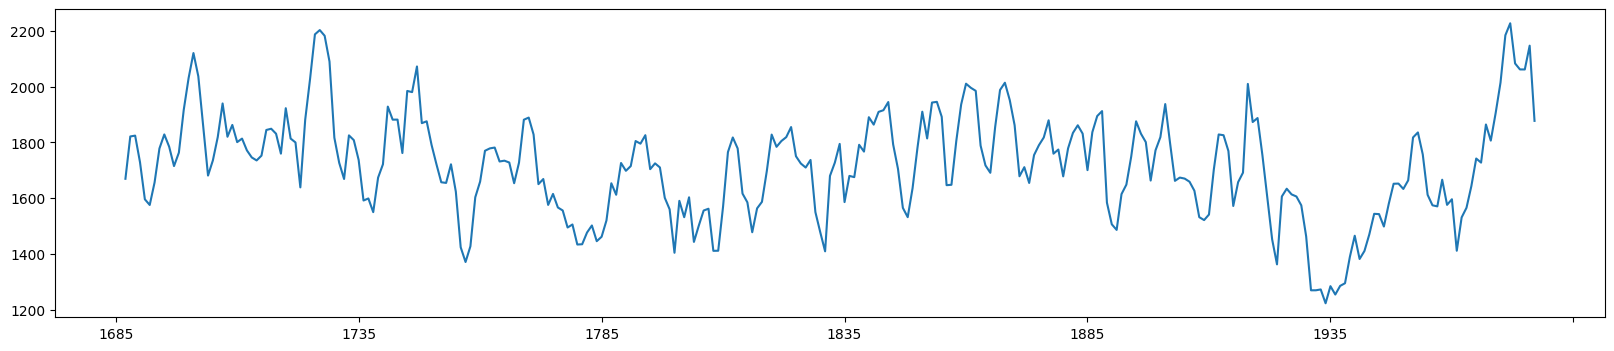

In [61]:
(data.iloc[5,5:]).rolling(window=3).mean().plot(figsize=(20,4))

# Image Classification Data Sets

Here is a small sample of image dataset that can be used for image classification tasks:

1. [MNIST](http://yann.lecun.com/exdb/mnist/) 
2. [Extended MNIST](https://www.nist.gov/itl/products-and-services/emnist-dataset)
3. [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
4. [Japanese MNIST](https://github.com/rois-codh/kmnist)
5. [CIFAR](https://www.cs.toronto.edu/~kriz/cifar.html)
6. [Olivetti faces data set](https://scikit-learn.org/0.19/datasets/olivetti_faces.html)

In [162]:
from sklearn.datasets import fetch_olivetti_faces
from math import sqrt
from random import randint

In [154]:
olivetti = fetch_olivetti_faces()
olivetti['data'].shape

(400, 4096)

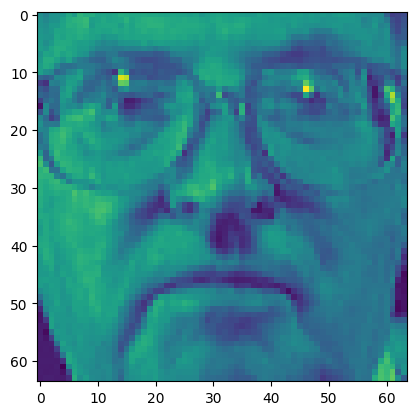

In [192]:
faces = olivetti['data'].reshape((400,64,64))
N = randint(0,400)
plt.imshow(faces[N])

In [65]:
with urlopen('http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz') as url:
    fmnist = np.frombuffer(gzip.open(BytesIO(url.read()),'rb').read(), 
                           dtype=np.uint8,
                           offset=16)

fmnist = fmnist.reshape(10000, 784)

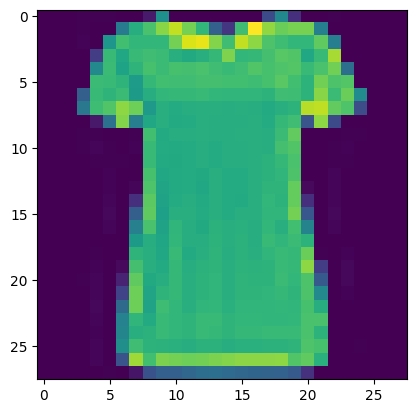

In [123]:
N = np.random.randint(10000)
plt.imshow(fmnist[N].reshape((28,28)))

# Medical Datasets

1. [A curated collection of EEG datasets](https://github.com/meagmohit/EEG-Datasets)
2. [Physionet](https://physionet.org/about/database/) is an open collection of open human physiological datasets.
3. [World Health Organization (WHO)](https://apps.who.int/gho/data/node.resources)
4. [Center for Disease Control (CDC)](https://wonder.cdc.gov/DataSets.html)
5. [Child Health and Development Studies](https://www.chdstudies.org/research/information_for_researchers.php)
6. [National Cancer Institute Datasets](https://seer.cancer.gov/data-software/)
7. [Brain/Neural Computer Interaction Datasets](http://bnci-horizon-2020.eu/database/data-sets)


## An example with WHO data

In [125]:
with urlopen('https://covid19.who.int/WHO-COVID-19-global-data.csv') as url:
    data = pd.read_csv(url)
data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
237469,2022-09-26,ZW,Zimbabwe,AFRO,2,257342,0,5599
237470,2022-09-27,ZW,Zimbabwe,AFRO,0,257342,0,5599
237471,2022-09-28,ZW,Zimbabwe,AFRO,0,257342,0,5599
237472,2022-09-29,ZW,Zimbabwe,AFRO,0,257342,0,5599


<AxesSubplot:>

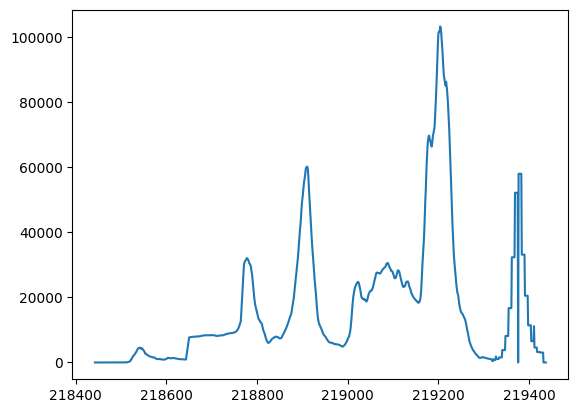

In [149]:
data[data['Country_code']=='TR']['New_cases'].rolling(window=7).mean().plot()

<AxesSubplot:>

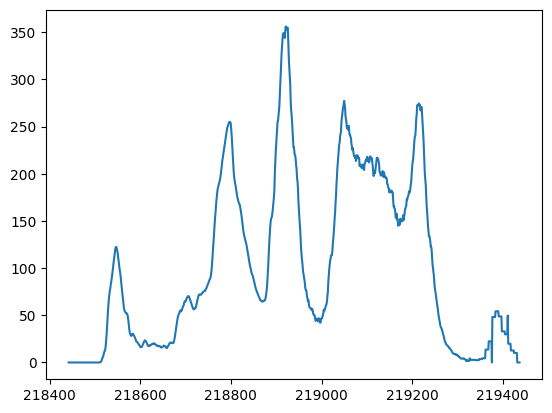

In [150]:
data[data['Country_code']=='TR']['New_deaths'].rolling(window=7).mean().plot()

<AxesSubplot:>

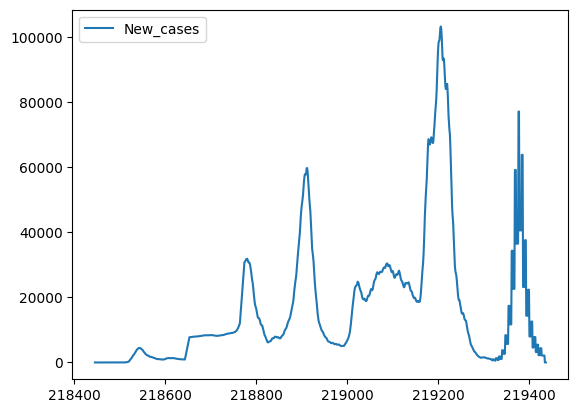

In [138]:
pd.DataFrame(data[data['Country_code']=='TR']['New_cases'].fillna(0).rolling(window=10).mean()).plot()

# APIs where you would have to register and login

All of the data sources I quoted above are open. You don't neet to enter credentials to login and access the data. However, most commercial data vendors do ask you to register and login before you access their data. 

1. [NASDAQ Financial Data](https://data.nasdaq.com/). Nasdaq is world's first electronic exchange platform for buying and trading securities. It has an extensive data collection on markets. But you would need their specific python library, and also register at their site (you'll need and API key).
2. [Yahoo! Finance Data](https://finance.yahoo.com/quotes/API,Documentation/view/v1/): You can download financial data from Yahoo's financial data API.
2. You can fetch data from [twitter](https://twitter.com) through their [API](https://developer.twitter.com/en/docs/twitter-api/getting-started/getting-access-to-the-twitter-api) and analyze it via python libraries. [Tweepy](https://www.tweepy.org/) is a popular choice, but you should definitely look around and find one that suits your needs.


## An example from NASDAQ

In [193]:
import nasdaqdatalink
nasdaqdatalink.read_key("/home/kaygun/.config/apikey")

In [194]:
data = nasdaqdatalink.get('CHRIS/CME_W1')
data

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1959-07-01,195.70,196.70,195.70,196.40,NaN,196.40,5828.0,25273.0
1959-07-02,196.30,197.40,196.30,197.10,NaN,197.10,4780.0,26524.0
1959-07-06,196.60,197.60,196.60,197.00,NaN,197.00,6591.0,27452.0
1959-07-07,197.30,197.50,196.70,197.10,NaN,197.10,5604.0,28749.0
1959-07-08,197.20,197.40,196.30,196.40,NaN,196.40,4538.0,30527.0
...,...,...,...,...,...,...,...,...
2021-06-23,653.25,668.25,653.25,662.25,10.25,661.25,35830.0,59819.0
2021-06-24,660.25,660.75,642.00,650.50,-10.00,651.25,27390.0,49474.0
2021-06-25,650.50,656.75,634.50,634.75,-14.25,637.00,35502.0,38808.0


<AxesSubplot:xlabel='Date'>

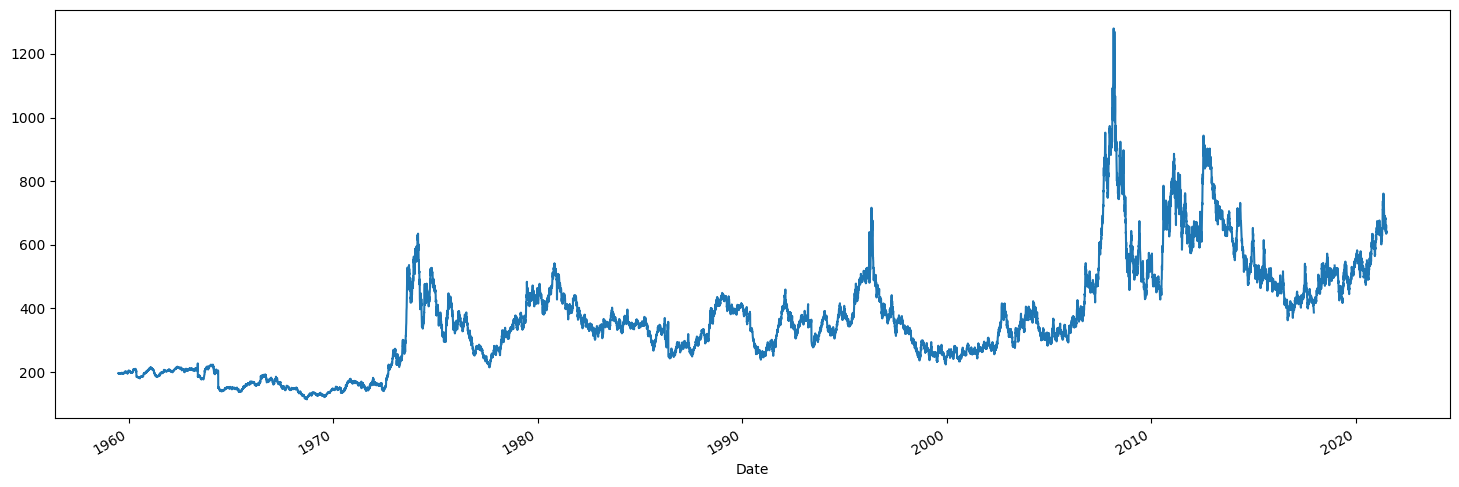

In [197]:
data['Last'].plot(figsize=(18,6))

<AxesSubplot:xlabel='Date'>

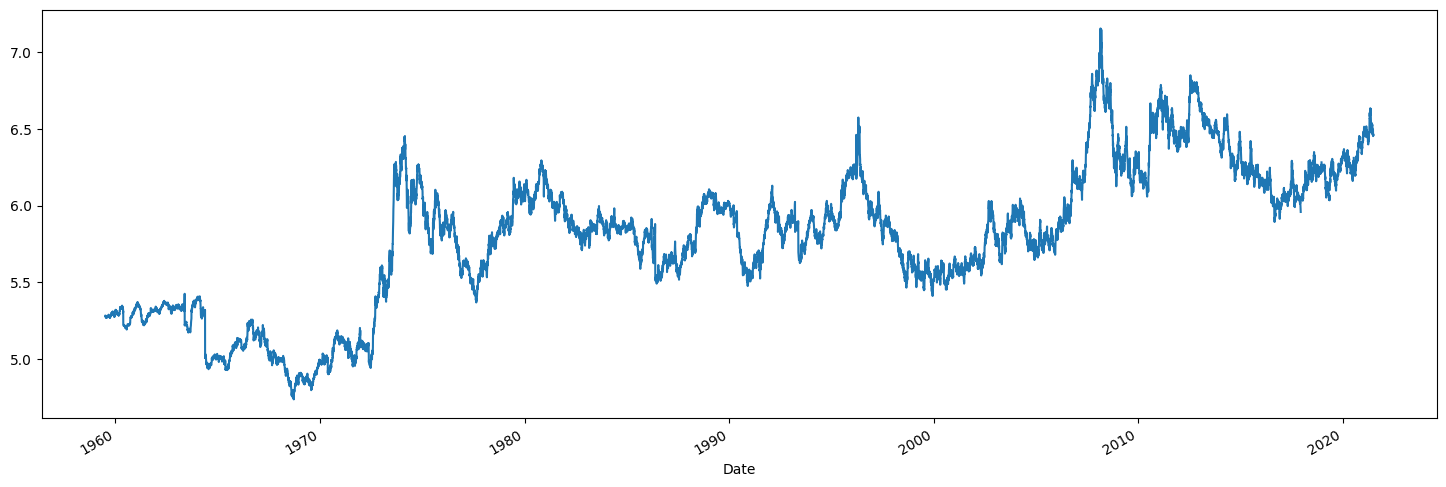

In [198]:
np.log(data['Last']).plot(figsize=(18,6))

## An example with tweepy

In [199]:
#!pip install tweepy
import tweepy as tw
import json

I put all the necessary login details for the api into a single JSON file in my own directory. When you register at twitter you should replace 'apikey' file with your own with the following structure:

    {"API_key": "your api key",
     "API_secret_key": "your api secret key",
     "access_token": "your access token",
     "access_secret": "your access token secret"}

In [200]:
with open('/home/kaygun/.config/twitter/apikey') as file:
    keys = json.load(file)

This is how you would login:

In [201]:
auth = tw.OAuth1UserHandler(
   keys["API_key"], keys["API_secret_key"], keys["access_token"], keys["access_secret"]
)

api = tw.API(auth)

Let us collect some tweets from this month:

In [205]:
tweets = api.search_tweets(q='Westworld', lang='en', count=100)

and display 10 of them:


In [206]:
[x.text for x in tweets[:10]]

['28.  Moon knight\n29.  Elite\n30.  Money Heist\n31.  The falcon and the winter soldier\n32.  The Mandalorian \n33.  The… https://t.co/D9efB243fv',
 "You want to know who I am? Who I really am? I'm a god.",
 'Westworld now has a provocative Party Host who works in the Import &amp; Export sector at the Kirkby Lonsdale location.… https://t.co/6jIYhSO9Gs',
 'RT @aberncthy: happy 6th birthday westworld you will always be famous to #real tv enjoyers \U0001faf6 https://t.co/5SES4YKqLE',
 'Roberto Orci and Alex Kurtzman have broken up but need no introduction.\n\nEdward Kitsis and Adam Horowitz started ou… https://t.co/jhAm543Pzw',
 'RT @FANdemoniumNet: Join us in wishing a happy birthday to @TessaThompson_x! We hope that you have a wonderful birthday. #happybirthday #te…',
 '@tanaysriva The extended Westworld soundtrack!',
 'Westworld Season 1 (Episode 1) - Opening Scenes 1080p https://t.co/q89UoIVip9 via @YouTube',
 'The company also said that it is committed to the "human form," which imm

In [207]:
res = api.search_users('Atabey_Kaygun')

In [87]:
res[0]

User(_api=<tweepy.api.API object at 0x7f337f0d2a10>, _json={'id': 17239073, 'id_str': '17239073', 'name': 'Atabey Kaygun', 'screen_name': 'Atabey_Kaygun', 'location': 'Istanbul', 'description': 'mathematician, batteries included.', 'url': 'https://t.co/T0G1VpGUdq', 'entities': {'url': {'urls': [{'url': 'https://t.co/T0G1VpGUdq', 'expanded_url': 'http://kaygun.tumblr.com/', 'display_url': 'kaygun.tumblr.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 1303, 'friends_count': 3561, 'listed_count': 110, 'created_at': 'Fri Nov 07 21:14:10 +0000 2008', 'favourites_count': 6212, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 22009, 'lang': None, 'status': {'created_at': 'Sun Oct 02 08:07:01 +0000 2022', 'id': 1576483881297276928, 'id_str': '1576483881297276928', 'text': 'RT @carlcarrie: 🐙\xa0Generalized additive models in Python with a Bayesian twist - GAMMY\n\nestimate unknown functions from no

## An example with Yahoo! Finance



In [208]:
import yfinance as yf
import numpy as np
import pandas as pd

In [237]:
msft = yf.Ticker("NDX")
hist = msft.history(period="max")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1985-10-01,110.620003,112.160004,110.565002,112.139999,153160000,0,0.0
1985-10-02,112.139999,112.540001,110.779999,110.824997,164640000,0,0.0
1985-10-03,110.839996,111.184998,110.120003,110.870003,147300000,0,0.0
1985-10-04,110.870003,110.870003,109.855003,110.074997,147900000,0,0.0
1985-10-07,110.074997,110.135002,108.175003,108.199997,128640000,0,0.0
...,...,...,...,...,...,...,...
2022-09-26,11283.139648,11473.360352,11235.740234,11254.110352,4697730000,0,0.0
2022-09-27,11411.339844,11502.379883,11175.290039,11271.750000,4445050000,0,0.0
2022-09-28,11258.740234,11546.870117,11210.809570,11493.830078,4556100000,0,0.0


<AxesSubplot:xlabel='Date'>

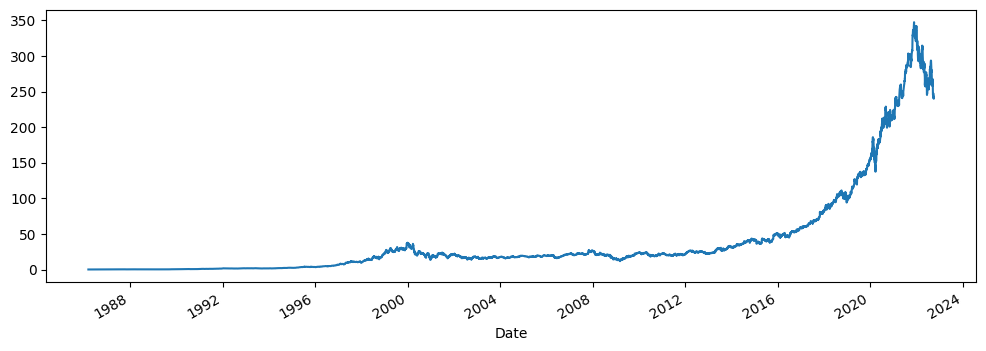

In [90]:
hist['High'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

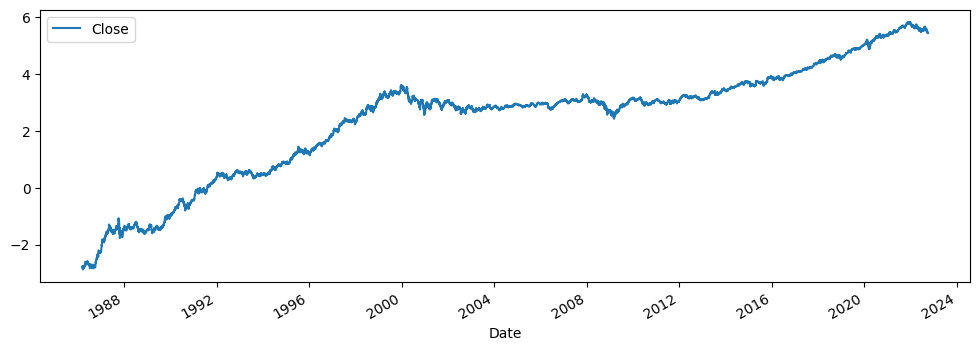

In [91]:
xs = pd.DataFrame(np.log(hist['Close']))
xs.plot(figsize=(12,4))

## An example with UCI

In [210]:
with urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip') as url:
    zf = ZipFile(BytesIO(url.read()))
    data = pd.read_csv(zf.open('bank.csv'),sep=';')
    
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [213]:
res = pd.crosstab(data['education'],data['y'])
res

y,no,yes
education,,
primary,614,64
secondary,2061,245
tertiary,1157,193
unknown,168,19


In [225]:
xs = res/res.sum(axis=0)
xs

y,no,yes
education,,
primary,0.15350,0.122841
secondary,0.51525,0.470250
tertiary,0.28925,0.370441
unknown,0.04200,0.036468


In [224]:
import scipy.stats as stats

In [226]:
stats.ttest_rel(xs['no'],xs['yes'])

Ttest_relResult(statistic=-1.8411330325495386e-16, pvalue=0.9999999999999999)

In [228]:
res = pd.crosstab(data['default'],data['education'])
res

education,primary,secondary,tertiary,unknown
default,,,,
no,668,2260,1333,184
yes,10,46,17,3


In [231]:
xs = res/res.sum(axis=0)
xs

education,primary,secondary,tertiary,unknown
default,,,,
no,0.985251,0.980052,0.987407,0.983957
yes,0.014749,0.019948,0.012593,0.016043


In [234]:
stats.ttest_rel(xs['unknown'],xs['tertiary'])

Ttest_relResult(statistic=8.04465564198114e-15, pvalue=0.9999999999999949)